In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('uber.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7bc25bb8d3c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc25bae9ba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bc25bb8fca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc25bae8550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc25bae9270>],
 'means': []}

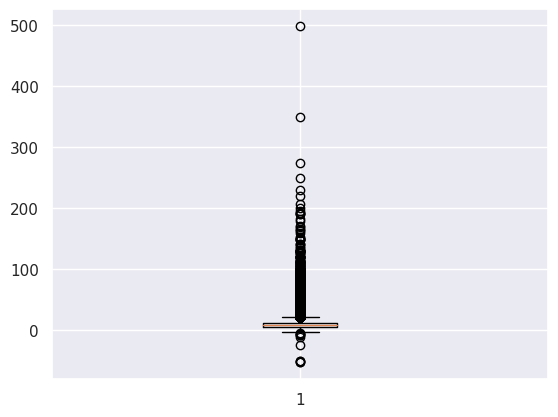

In [10]:
plt.boxplot(df['fare_amount'])

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
q_low=df['fare_amount'].quantile(0.01)
q_high=df['fare_amount'].quantile(0.99)
df=df[(df['fare_amount']>q_low) & (df['fare_amount']<q_high)]

In [14]:
df.shape

(194911, 7)

In [15]:
x=df.drop('fare_amount',axis=1)
y=df['fare_amount']


In [16]:
x['pickup_datetime']=pd.to_numeric(pd.to_datetime(x['pickup_datetime']))

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test)


In [21]:
from sklearn.metrics import mean_squared_error
print('rsme: ',np.sqrt(mean_squared_error(y_test,y_pred)))

rsme:  7.963984542298167


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=101)

In [24]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [25]:
y_pred2=rf.predict(x_test)

In [27]:
print ('rsme: ',np.sqrt(mean_squared_error(y_test,y_pred2)))

rsme:  3.4098030236592516
